In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from book.Roughgarden import four_examples as ex
import timeit
import functools

In [2]:
number_of_lists = 30
number_of_elements = np.linspace(1, 300, number_of_lists, dtype=int)
number_of_elements

array([  1,  11,  21,  31,  42,  52,  62,  73,  83,  93, 104, 114, 124,
       135, 145, 155, 165, 176, 186, 196, 207, 217, 227, 238, 248, 258,
       269, 279, 289, 300])

In [12]:
# Worst case timings
timings_for = {
    "searching_one_array": [],
    "searching_two_arrays": [],
    "check_for_common_element": [],
    "check_for_duplicates": [],
}

measurements = 10
for n in number_of_elements:
    A1= np.arange(n)
    t1 = timeit.Timer(functools.partial(ex.searching_one_array, A1, n))
    timings_for["searching_one_array"].append(t1.timeit(measurements))

    A2 = np.arange(n)
    t2 = timeit.Timer(functools.partial(ex.searching_two_arrays, A1, A2, n))
    timings_for["searching_two_arrays"].append(t2.timeit(measurements))

    A2 = np.arange(n, 2*n, 1)
    t3 = timeit.Timer(functools.partial(ex.check_for_common_element, A1, A2))
    timings_for["check_for_common_element"].append(t3.timeit(measurements))

    t4 = timeit.Timer(functools.partial(ex.check_for_duplicates, A1))
    timings_for["check_for_duplicates"].append(t4.timeit(measurements))

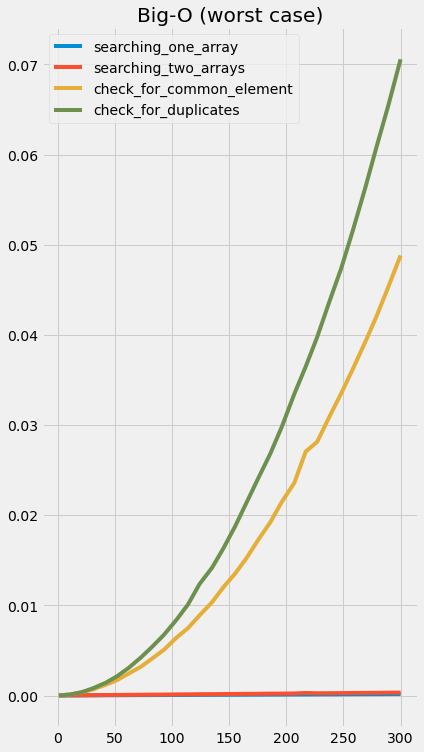

In [18]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,12))
ax.title.set_text("Big-O (worst case)")

label = "searching_one_array"
ax.plot(number_of_elements, timings_for[label], label=label)

label = "searching_two_arrays"
ax.plot(number_of_elements, timings_for[label], label=label)

label = "check_for_common_element"
ax.plot(number_of_elements, timings_for[label], label=label)

label = "check_for_duplicates"
ax.plot(number_of_elements, timings_for[label], label=label)

ax.legend()